# The Image Cartoonifier SoC’23
# Week 2 Assignment

## PART I (Warm-up) :

Q1: Consider the following function
𝑓(𝑥_1, 𝑥_2) = (𝑥_1 − 𝑥_2)^4 + 8𝑥_1𝑥_2 − 𝑥_1 + 𝑥_2 + 3.
Plot 𝑓(𝑥_1, x_2) versus x_1 for x_2 = −1 and x_2 = +1. Thus, there should be two curves in this same figure. (HINT: use matplotlib and numpy)


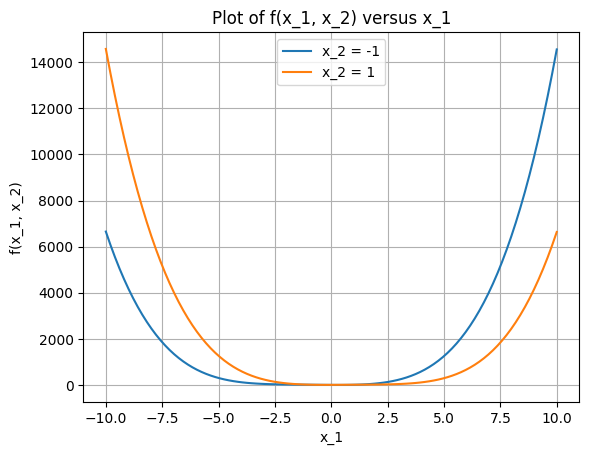

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x_1, x_2):
    return (x_1 - x_2)**4 + 8*x_1*x_2 - x_1 + x_2 + 3

x1 = np.linspace(-10, 10, 100)

plt.plot(x1, f(x1, -1), label="x_2 = -1")
plt.plot(x1, f(x1, 1), label="x_2 = 1")
plt.xlabel("x_1")
plt.ylabel("f(x_1, x_2)")
plt.title("Plot of f(x_1, x_2) versus x_1")
plt.legend()
plt.grid(True)
plt.show()

Q2. For the same function above,Generate a contour plot of the function.

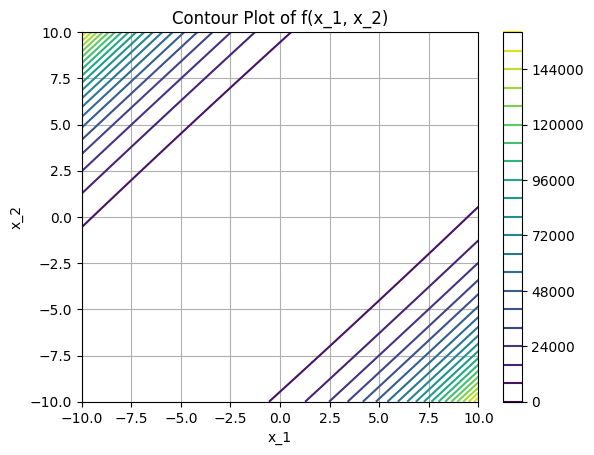

In [3]:
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = f(X1, X2)

plt.contour(X1, X2, Z, levels=20)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Contour Plot of f(x_1, x_2)')
plt.colorbar()
plt.grid(True)
plt.show()

## PART II (Mandatory) :
## LINEAR REGRESSION

Q1.
A. Create a dataset containing no. of years of experience and corresponding
salary of employees. There are three data points.
No. of years experience --> Salary: 
1 --> 300,
3 --> 480,
5 --> 570.
These three points will constitute our data or training set.
Scatter plot the dataset, by including axis labels and title of the plot.
You are given w = 200 and b = 100.

Text(0.5, 1.0, 'Salary vs Years of Experience')

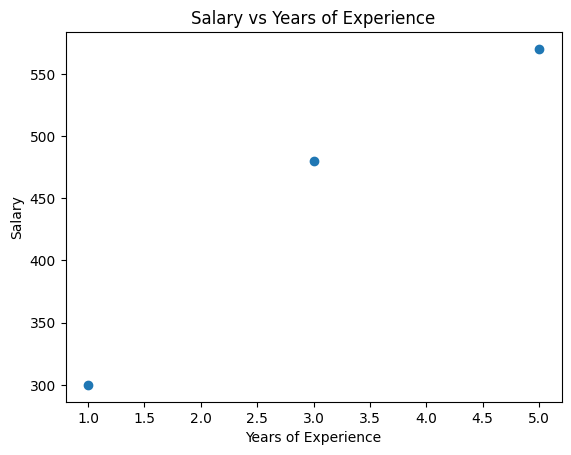

In [4]:
import matplotlib.pyplot as plt

years_of_experience = [1, 3, 5]
salaries = [300, 480, 570]

plt.scatter(years_of_experience, salaries)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")

B. Define a function compute_cost which implements cost function(J) for
the above problem data (same training data and parameters) and returns the
total cost.

In [6]:
w = 200
b = 100

def compute_cost(years_of_experience, salaries, w, b):
    total_cost = 0

    for i in range(len(years_of_experience)):
        x = years_of_experience[i]
        y = salaries[i]
        predicted_salary = w * x + b
        cost = (predicted_salary - y) ** 2
        total_cost += cost

    return total_cost

compute_cost(years_of_experience, salaries, w, b)

329300

C. Create a function compute_gradient which returns 𝑑𝐽/𝑑𝑤, 𝑑𝐽/𝑑𝑏 for the above data. (All Notations are same as in the video lec’s)

In [8]:
def compute_gradient(years_of_experience, salaries, w, b):
    dJw = 0
    dJb = 0

    for i in range(len(years_of_experience)):
        x = years_of_experience[i]
        y = salaries[i]
        predicted_salary = w * x + b

        dJw += 2 * x * (predicted_salary - y)
        dJb += 2 * (predicted_salary - y)

    dJw_avg = dJw/len(years_of_experience)
    dJb_avg = dJb/len(years_of_experience)

    return dJw_avg, dJb_avg

dJw, dJb = compute_gradient(years_of_experience, salaries, w, b)
print("dJ/dw:", dJw)
print("dJ/db:", dJb)

dJ/dw: 2206.6666666666665
dJ/db: 500.0


Q2.
A. Write a function named compute_gradient_descent using the
functions you have created i.e, compute_cost, compute_gradient.
Initialize the parameters w_init and b_init as ‘0’.You are given, number of
iterations: 10000 and learning rate i.e, alpha =0.01.
(Hint: This function takes the arguments (x_train, y_train, w_init, b_init,
alpha, num_iters) where x_train and y_train are the no. of years experience
and salary respectively.)

In [9]:
def compute_gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init

    for i in range(num_iters):
        dJw, dJb = compute_gradient(x_train, y_train, w, b)
        w = w - alpha * dJw
        b = b - alpha * dJb

    return w, b

x_train = years_of_experience
y_train = salaries
w_init = 0
b_init = 0
alpha = 0.01
num_iters = 10000

w_final, b_final = compute_gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters)
print("Final values - w:", w_final, "b:", b_final)

Final values - w: 67.5000000000009 b: 247.4999999999966


## Q)3. LOGISTIC REGRESSION 

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_data = pd.read_csv('corrected train set.csv')
test_data = pd.read_csv('week 1 test.csv')

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

X = train_data.drop('failure', axis=1)
y = train_data['failure']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

our_model = LogisticRegression()
our_model.fit(X_train, y_train)

y_val_pred = our_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

test_predictions = our_model.predict(test_data)

test_data['failure_predictions'] = test_predictions
test_data.to_csv('test_predictions.csv', index=False)

Validation Accuracy: 0.7796383121232418
